# Create StationXML File

        ENTER INSTRUMENT DETAILS AND STATION DETAILS
        --------------------------------------------
        stnm   - station code e.g. ABCD
        ntwk   - network code e.g. XX
        chan   - channel code e.g. HHZ
        locode - location code e.g. 00 or leave blank 
        stla   - station latitude (degree decimal) e.g. -65.9876
        stlo   - station longitude (degree decimal) e.g. -130.7654
        stel   - station elevation above MSL (meters) e.g. 354
        stdp   - depth of the instrument from the surface (meters) e.g. 10
        cmpaz  - component azimuth: vertical = 0, north = 0, east = 90
        cmpinc - component incident angle: vertical up = -90, horizontal = 0 
        Fs     - sampling rate (i.e. 1/dt)  e.g. if dt = 0.025s, then Fs = 40
        stdate - start data + time of the instrument = ('yyyy,mm,dd,hh,mn,sec.decimal') e.g. ('2016,1,2,08,30,55.99')
        endate - end date + time of the instrument   = ('yyyy,mm,dd,hh,mn,sec.decimal') e.g. ('2017,1,2,23,30,55.99')
        sitenm - site name e.g. Gippsland
        stcomm - comments about the station e.g. At the top of a hill
        sensornm   - name of the sensor e.g. Streckeisen or Guralp
        sensortype - type of the sensor eg. STS-1
        sensorT    - natural period of the sensor e.g. 360 seconds
        senvty     - some sensors have sensitivity as a variable
        sensorkey  - number of strings required to uniquely identify a response for an instrument
                     if sensornm, sensortype, sensorT, and senvty are used for the key, sensorkey = 4
                     if sensornm, sensortype, and sensorT are used for the key, sensorkey = 3
                     if sensornm and sensortype are used for the key, sensorkey = 2
                     
        * data logger information can be included but ignored here because Kelunji Geckos and EchoPros are not 
          included in the NRL. Thus, include this manually as described later. This is a critical step. 
        
        * Use the TEST AREAS at the bottom of this script to find out station specific information from the mseed 
          files and/or NRL if these are unknown.
        
        OUTPUT: stnm_ntwk_chan.xml
   
   
        SENSOR KEYS
        -----------
        sensornm, sensortype, sensorT, and sometimes senvty strings consitute the unique sensor key to retrive sensor 
        responses from the IRIS DMC Library of Nominal Responses for Seismic Instruments (NRL). Thus, these need to 
        be declared exactly. sensorkey declares how many of these strings are used to define a unique sensor key.   
        
        If you are unclear about what to use for keys, follow these steps in the last cell of this script.
        
        e.g. using an instrument from the manufacturer Nanometrics, which is your sensornm
            
        STEP 1: Find the available instrument types 
        
                    from obspy.clients.nrl import NRL
                    sensornm = 'Nanometrics'
                    print(nrl.sensors[sensornm])
                    
                This will output the available instrument types. For example, Nanometrics has;
                
                    'Meridian Compact Posthole', 'Meridian Posthole',
                    'Titan Accelerometer', 'Trillium 120 Horizon', 'Trillium 120P/PA',
                    'Trillium 120Q/QA,PH,BH (Vault, Posthole or Borehole)',
                    'Trillium 240', 'Trillium 360', 'Trillium 40',
                    'Trillium All-Terrain', 'Trillium Cascadia Accelerometer',
                    'Trillium Cascadia seismometer', 'Trillium Compact 120 (Vault,
                     Posthole, OBS)', 'Trillium Compact 20 (Vault, Posthole, OBS)'
                     
        STEP 2: Pick your instrument from this list, which is your sensortype and repeat the print statement by 
                including it;
          
                     from obspy.clients.nrl import NRL
                     sensornm = 'Nanometrics'
                     sensortype = 'Meridian Posthole'
                     print(nrl.sensors[sensornm][sensortype])
                    
                Check if this outputs a list of periods (e.g. '20 seconds', '360 seconds'). If a list is present,
                pick the appropriate one for your instrument, which is your sensorT. In this case set selected 
                sensornm, sensortype, sensorT, and sensorkey = 3. On the other hand, if a list is not provided (in 
                this example 'Meridian Posthole, 120 s, 1200 V/m/s' ...., is printed), then sensornm and sensortype 
                are sufficient to set up a unique sensor key and sensorT is ignored. If this is the case, set 
                selected sensornm, sensortype, and sensorkey = 2. 
                
                
        STEP 3: If the instrument has a sensitivity as an additional variable, then available choices will show up as 
                a list when STEP 2 is complete. For example,
                                    
                                    sensornm   = 'Guralp'
                                    sensortype = 'CMG-6T'
                                    sensorT    = '10s - 100Hz'
                                    print(nrl.sensors[sensornm][sensortype][sensorT])
                                    
                                    produces the following list of sensitivities,
                
                                    Select the sensor sensitivity in V/m/s (4 items):
                                    '2000', '20000', '2400', '4000'
                
                Pick one from these sensitivity and declare senvty as well and set sensorkey = 4
                
                
       For the Nanmetrics example used here, you will set up variables as follows;
                
                    sensornm   = 'Nanometrics'
                    sensortype = 'Meridian Posthole'
                    sensorT    = 'ignored, you can type anything here'
                    senvty     = 'ignored, you can type anything here'
                    sensorkey  = 2
                     
 
       
       MODIFYING INSTRUMENT STAGE GAIN FOR DATA LOGGER
       -----------------------------------------------
       It is CRITICAL that the user knows counts per volts (cpv) conversion of the data logger exactly. For the data 
       loggers available in the NRL, this can be automatically included in the response (not done in this script). 
       For Kelunji Geckos and EchoPros cpv = 419430.4. This data logger conversion should reflect in <StageGain> 
       contained within the block <Stage number="1"> (i.e., stage 1) in the StationXML file.   
       
       The output of this script will contain only the instrument sensitivity in the above <StageGain>. For instance, 
       
       For a Guralp CMG-6T 1s - 100 Hz 2400 instrument, this would be as follows;
       
       <StageGain>
              <Value>2400</Value>
              <Frequency>5.0</Frequency>
       </StageGain>
       
       To include the data logger conversion, the instrument sensitivity (in the example 2400) must be multiplied by 
       419430.4 for Kelunji Geckos and EchoPros. Add this modification to the StationXML file manually and ensure 
       that stage gain of all three components are modified this way. After this modification, the StationXML file 
       will have:
       
       (1) for a Guralp CMG-6T 1s - 100 Hz 2400 instrument (2400 x 419430.4)
           <StageGain>
                  <Value>1006632960</Value>
                  <Frequency>5.0</Frequency>
           </StageGain>
       
       (2) for a Guralp CMG-3ESP 60 s - 50 Hz 2000 instrument (2000 x 419430.4)
           <StageGain>
                  <Value>838860800</Value>
                  <Frequency>1.0</Frequency>
           </StageGain>
       
       (3) For the Nanometrics Compact 20 instrument (753.1x419430.4 = 315873034.24)
           <StageGain>
                  <Value>315873034.24</Value>
                  <Frequency>1.0</Frequency>
           </StageGain>
       
 
       UoM INSTRUMENT TYPES
       --------------------
       
       copy and paste the appropriate instrument types to create StationXML files. 
       
               (a) Guralp CMG-6T: 
                    sensornm   = 'Guralp'
                    sensortype = 'CMG-6T'
                    sensorT    = '1s - 100Hz'
                    senvty     = '2400'
                    sensorkey  = 4
                    
                    STATS: BEST,BRIG,WPSH,WPNH  
                
               (b) Guralp CMG-6T: 
                    sensornm   = 'Guralp'
                    sensortype = 'CMG-6T'
                    sensorT    = '30s - 100Hz'
                    senvty     = '2400'
                    sensorkey  = 4
                    
                    STATS: THYS
                    
               (c) Guralp CMG-3ESP
                    sensornm   = 'Guralp'
                    sensortype = 'CMG-3ESP'
                    sensorT    = '60 s - 50 Hz'
                    senvty     = '2000'
                    sensorkey  = 4
                    
                    STATS: CLIF
       
               (d)  sensornm   = 'Nanometrics'
                    sensortype = 'Trillium Compact 20 (Vault, Posthole, OBS)'
                    sensorT    = '753 V/m/s'
                    senvty     = ''
                    sensorkey  = 3
                    
                    STATS: BRTH,DDNE,DDSW,DDWK,DEAL,STBK,LRNW





        Januka Attanayake
        University of Melbourne
        07 JUNE 2019

In [6]:
###############################################################
#                       USER INPUT                            #
###############################################################
stnm       = 'TYHS'
ntwk       = 'UM'
locode     = '0'
creator    = 'NRL'
#-----------------
chan_Z     = 'DLZ'
chan_E     = 'DLE'
chan_N     = 'DLN'
#-----------------
stla       = -37.8364
stlo       = 148.11938
stel       = 21
stdp       = 0
Fs         = 250
stdate     = '2019,1,21,0,0,0.00'
endate     = '2599,1,2,0,0,0.00'
sitenm     = 'Lake Tyers House'
stcomm     = 'Belongs to GipNet'
#-----------------
sensornm   = 'Guralp'
sensortype = 'CMG-6T'
sensorT    = '30s - 100Hz'
senvty     = '2400'
sensorkey  = 4




###############################################################
#             START BUILDING THE STATIONXML FILE              #
###############################################################
import obspy
from obspy.core.inventory import Inventory, Network, Station, Channel, Site
from obspy.clients.nrl import NRL
from obspy import read



inv   = Inventory(networks=[], source=creator)
net   = Network(code=ntwk, stations=[], description=stcomm, start_date=obspy.UTCDateTime(stdate))
sta   = Station(code=stnm, latitude=stla, longitude=stlo,elevation=stel, creation_date=obspy.UTCDateTime(stdate),
              site=Site(name=sitenm))

chanZ = Channel(code=chan_Z, location_code=locode, latitude=stla, longitude=stlo, elevation=stel, depth=stdp,
              azimuth=0, dip=-90, sample_rate=Fs)
chanN = Channel(code=chan_N, location_code=locode, latitude=stla, longitude=stlo, elevation=stel, depth=stdp,
              azimuth=0, dip=0, sample_rate=Fs)
chanE = Channel(code=chan_E, location_code=locode, latitude=stla, longitude=stlo, elevation=stel, depth=stdp,
              azimuth=90, dip=0, sample_rate=Fs)


###############################################################
#      QUERY NRL LIBRARY AND GET RESPONSE INFORMATION         #
###############################################################
nrl = NRL()

if sensorkey == 4:
    response = nrl.get_sensor_response(sensor_keys=[sensornm, sensortype, sensorT, senvty])
    
elif sensorkey == 3:
    response = nrl.get_sensor_response(sensor_keys=[sensornm, sensortype,sensorT])
    
else:
    response = nrl.get_sensor_response(sensor_keys=[sensornm, sensortype])



    
###############################################################
#    PUT ALL PIECES TOGETHER AND WRITE OUT THE STATIONXML     #
###############################################################   
chanZ.response = response
sta.channels.append(chanZ)
net.stations.append(sta)
inv.networks.append(net)

chanN.response = response
sta.channels.append(chanN)

chanE.response = response
sta.channels.append(chanE)

outfile = (stnm + '_' + ntwk + '_DL_ZNE.xml')
inv.write(outfile, format="stationxml", validate=True)

# Test area 1 for selecting unknown intrument keys

In [5]:
from obspy.clients.nrl import NRL
nrl = NRL()

sensornm = 'Guralp'
sensortype = 'CMG-3esp'
sT = '1s - 100Hz'
svt = '2400'

sensornm = 'Nanometrics'
sensortype = 'Trillium Compact 20 (Vault, Posthole, OBS)'
sT = '753 V/m/s'

#sensornm = 'Nanometrics'
sensornm = 'Guralp'

#sensortype = 'CMG-3ESP'
sensortype = 'CMG-6T'

#sT = '60 s - 50 Hz'
sT = '30s - 100Hz'

svt = '2000'
svt = '2400'


print(nrl.sensors[sensornm][sensortype][sT][svt])
#print(nrl.sensors[sensornm][sensortype][sT])
#print(nrl.sensors[sensornm][sensortype])
#print(nrl.sensors[sensornm])

('CMG-6T, 30s-100Hz, 2400 V/m/s', 'http://ds.iris.edu/NRL/sensors/guralp/RESP.XX.NS302..BHZ.CMG6T.30_100.2400')


# Test area 2 for retrieving stnm, ntwk, chan, Fs, and locode from the mseed file

UM.DDWK..CHZ | 2018-01-01T00:00:10.620000Z - 2018-01-01T00:01:15.968000Z | 250.0 Hz, 16338 samples


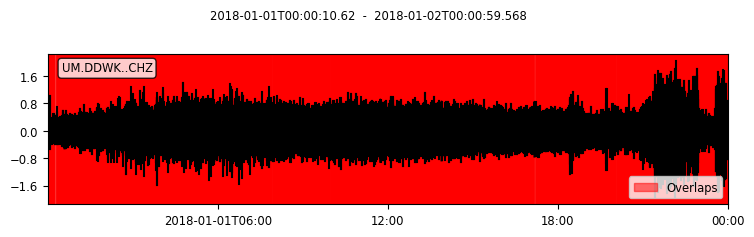

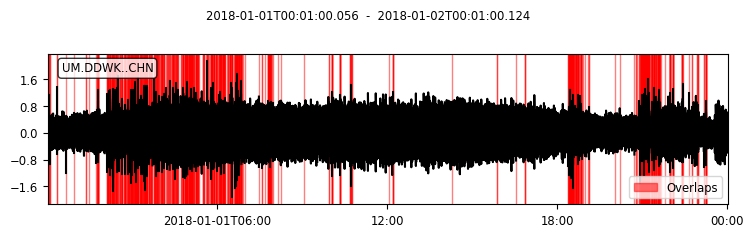

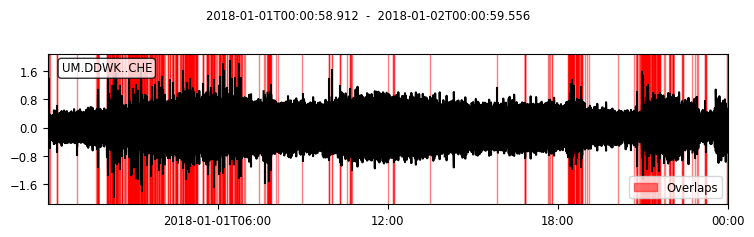

In [44]:
from obspy import read, read_inventory

stnm       = 'DDWK'
chan       = 'CHZ'
mseed_data = 'data/DDWK/2018-01/DDWK.2018-01-01_DDWK.ms'
statXML    = 'StationXML/DDWK_UM_ZNE.xml'

print(seis)
#print('Number of traces:',len(staxns.__str__()))

sgrams = read(mseed_data)
metdat = read_inventory(statXML)
attr   = sgrams.select(station=stnm,channel=chan)[0]
trace  = sgrams.select(station=stnm,channel=chan)

freq_lims         = (0.5,1,5,10)
trace_resp_rmv1 = trace.remove_response(inventory=metdat, output='VEL', 
                                       pre_filt=freq_lims)

# Plotting
trace_resp_rmv1.plot()





chan       = 'CHN'
attr   = sgrams.select(station=stnm,channel=chan)[0]
trace  = sgrams.select(station=stnm,channel=chan)

trace_resp_rmv2 = trace.remove_response(inventory=metdat, output='VEL', 
                                       pre_filt=freq_lims)

# Plotting
trace_resp_rmv2.plot()





chan       = 'CHE'
attr   = sgrams.select(station=stnm,channel=chan)[0]
trace  = sgrams.select(station=stnm,channel=chan)

trace_resp_rmv3 = trace.remove_response(inventory=metdat, output='VEL', 
                                       pre_filt=freq_lims)

# Plotting
trace_resp_rmv3.plot(show=False)

         network: UM
         station: DDWK
        location: 
         channel: CHZ
       starttime: 2018-01-01T00:00:10.620000Z
         endtime: 2018-01-01T00:01:15.968000Z
   sampling_rate: 250.0
           delta: 0.004
            npts: 16338
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 40, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 1024, 'filesize': 222046208})


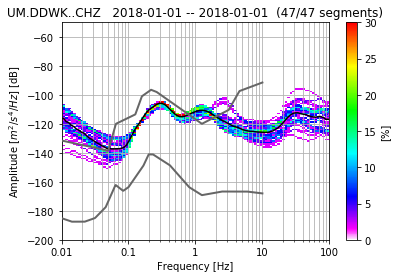

In [2]:
from obspy import read, read_inventory
from obspy.io.xseed import Parser
from obspy.signal import PPSD
from obspy.imaging.cm import pqlx

stnm       = 'DDWK'
chan       = 'CHZ'
mseed_data = 'data/DDWK/2018-01/DDWK.2018-01-01_DDWK.ms'
statXML    = 'StationXML/DDWK_UM_ZNE.xml'
stack_TW   = 3600
olap       = 0.5

# PPSD
staxn  = read(mseed_data)
seis   = staxn.select(station=stnm,channel=chan)[0]
traces = staxn.select(station=stnm,channel=chan)
metdat = read_inventory(statXML)
        
sta_ppsd = PPSD(seis.stats, metadata=metdat, 
                                  ppsd_length=stack_TW, overlap=olap, 
                                  period_smoothing_width_octaves=1.0)
sta_ppsd.add(traces)

ppsdfig = sta_ppsd.plot(period_lim=(0.01, 100), show_mean=True,
                        xaxis_frequency=True, cmap=pqlx, show=False,
                        show_coverage=False)

print(seis.stats)

# Test Area 3 Get infor for stationXML

In [16]:
from obspy import read

mseed_data   = '/Volumes/GIPNET_2/data/BRTH/2018-06/BRTH.2018-06-19_BRTH.ms'

sgrams = read(mseed_data)
print(sgrams.__str__())



87 Trace(s) in Stream:

UM.BRTH..CHE | 2018-06-19T02:40:59.248000Z - 2018-06-19T02:41:03.364000Z | 250.0 Hz, 1030 samples
...
(85 other traces)
...
UM.BRTH..CHZ | 2018-06-19T03:19:16.872000Z - 2018-06-19T03:22:04.112000Z | 250.0 Hz, 41811 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [16]:
inv = read_inventory(skdjfalifd)
stla = inv.latitude

tr.stats.latitude = stla

tr.write(format='SAC')



Select the coil resistance for this HS-1: (2 items):
  '2500 Ohms', '3810 Ohms'


In [ ]:
stdate     = '2019,1,1,0,0,0.00' # 2019 january 1
endate     = '2019,1,31,0,0,0.00' # 2019 january 31

st.stats.starttime = '2020.10.20' # 2020 October 20